##### Подключение библиотек

In [38]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.lines
import math

##### Необходимые символьные переменные

In [39]:
x,phi,theta,psi = smp.symbols(r"x \phi \theta \psi",cls = smp.Function)
t,m,R,l0,c,g = smp.symbols(r"t m R l_{0} c g")

x = x(t)
phi = phi(t)
theta = theta(t)
psi = psi(t)

x_d = smp.diff(x,t)
phi_d = smp.diff(phi,t)
theta_d = smp.diff(theta,t)
psi_d = smp.diff(psi,t)

x_dd = smp.diff(x_d,t)
phi_dd = smp.diff(phi_d,t)
theta_dd = smp.diff(theta_d,t)
psi_dd = smp.diff(psi_d,t)

##### Потенциальная и кинетическая энергия, Лагранжиан системы

In [40]:
T = m*(x_d**2)/2 + m*(x**2)*(smp.sin(theta)**2)*(psi_d**2)/2 + m*(x**2)*(theta_d**2)/2 + m*(R**2)*(theta_d**2 + (psi_d**2)*(smp.sin(theta)**2))/8 + m*(R**2)*(phi_d**2 + (psi_d**2)*(smp.cos(theta)**2))/4
T

R**2*m*(sin(\theta(t))**2*Derivative(\psi(t), t)**2 + Derivative(\theta(t), t)**2)/8 + R**2*m*(cos(\theta(t))**2*Derivative(\psi(t), t)**2 + Derivative(\phi(t), t)**2)/4 + m*x(t)**2*sin(\theta(t))**2*Derivative(\psi(t), t)**2/2 + m*x(t)**2*Derivative(\theta(t), t)**2/2 + m*Derivative(x(t), t)**2/2

In [41]:
P = m*g*x*smp.cos(theta) + c*((x-l0)**2)/2
P

c*(-l_{0} + x(t))**2/2 + g*m*x(t)*cos(\theta(t))

In [42]:
L = T-P
L

R**2*m*(sin(\theta(t))**2*Derivative(\psi(t), t)**2 + Derivative(\theta(t), t)**2)/8 + R**2*m*(cos(\theta(t))**2*Derivative(\psi(t), t)**2 + Derivative(\phi(t), t)**2)/4 - c*(-l_{0} + x(t))**2/2 - g*m*x(t)*cos(\theta(t)) + m*x(t)**2*sin(\theta(t))**2*Derivative(\psi(t), t)**2/2 + m*x(t)**2*Derivative(\theta(t), t)**2/2 + m*Derivative(x(t), t)**2/2

##### Составление системы дифференциальных уравнений

In [43]:
eq_1 = (smp.diff(smp.diff(L,x_d),t) - smp.diff(L,x)).simplify()
eq_1

-c*(l_{0} - x(t)) + g*m*cos(\theta(t)) - m*x(t)*sin(\theta(t))**2*Derivative(\psi(t), t)**2 - m*x(t)*Derivative(\theta(t), t)**2 + m*Derivative(x(t), (t, 2))

In [44]:
eq_2 = (smp.diff(smp.diff(L,phi_d),t) - smp.diff(L,phi)).simplify()
eq_2

R**2*m*Derivative(\phi(t), (t, 2))/2

In [45]:
eq_3 = (smp.diff(smp.diff(L,theta_d),t) - smp.diff(L,theta)).simplify()
eq_3

m*(R**2*sin(2*\theta(t))*Derivative(\psi(t), t)**2/2 + R**2*Derivative(\theta(t), (t, 2)) - 4*g*x(t)*sin(\theta(t)) - 2*x(t)**2*sin(2*\theta(t))*Derivative(\psi(t), t)**2 + 4*x(t)**2*Derivative(\theta(t), (t, 2)) + 8*x(t)*Derivative(\theta(t), t)*Derivative(x(t), t))/4

In [46]:
eq_4 = (smp.diff(smp.diff(L,psi_d),t) - smp.diff(L,psi)).simplify()
eq_4

m*(-R**2*sin(2*\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) + R**2*cos(2*\theta(t))*Derivative(\psi(t), (t, 2))/2 + 3*R**2*Derivative(\psi(t), (t, 2))/2 + 4*x(t)**2*sin(2*\theta(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) - 2*x(t)**2*cos(2*\theta(t))*Derivative(\psi(t), (t, 2)) + 2*x(t)**2*Derivative(\psi(t), (t, 2)) - 4*x(t)*cos(2*\theta(t))*Derivative(\psi(t), t)*Derivative(x(t), t) + 4*x(t)*Derivative(\psi(t), t)*Derivative(x(t), t))/4

Выражаем вторые производные, составляем систему вида:
$$
\ddot{x} = f_{1}(\dot{x},\dot{\psi},\dot{\phi},\dot{\theta},x,\psi,\phi,\theta) 
\\
\ddot{\phi} = f_{2}(\dot{x},\dot{\psi},\dot{\phi},\dot{\theta},x,\psi,\phi,\theta) 
\\
\ddot{\theta} = f_{3}(\dot{x},\dot{\psi},\dot{\phi},\dot{\theta},x,\psi,\phi,\theta) 
\\
\ddot{\psi} = f_{4}(\dot{x},\dot{\psi},\dot{\phi},\dot{\theta},x,\psi,\phi,\theta) 
$$

In [47]:
doubleDeriv = smp.solve([eq_1,eq_2,eq_3,eq_4],
                        [x_dd,phi_dd,theta_dd,psi_dd],
                        rational = False,
                        simplify = False)
doubleDeriv[x_dd]

c*l_{0}/m - c*x(t)/m - g*cos(\theta(t)) + x(t)*sin(\theta(t))**2*Derivative(\psi(t), t)**2 + x(t)*Derivative(\theta(t), t)**2

Линеаризуем систему, введя дополнительные переменные:
$w_{x} = \dot{x} \ \ w_{\phi} = \dot{\phi} \ \ w_{\theta} = \dot{\theta} \ \ w_{\psi} = \dot{\psi}$

Система примет вид:
$$
\dot{w_{x}} = f_{1}(w_{x},w_{\phi},w_{\theta},w_{\psi},x,\phi,\theta,\psi)
\\
w_{x} = \dot{x}
\\ 
\dot{w_{\phi}} = f_{2}(w_{x},w_{\phi},w_{\theta},w_{\psi},x,\phi,\theta,\psi)
\\
w_{\phi} = \dot{\phi}
\\ 
\dots


$$

In [48]:
w_x_d_f = smp.lambdify((x,phi,theta,psi,x_d,phi_d,theta_d,psi_d,g,m,R,l0,c,t),
                        doubleDeriv[x_dd])
w_x_f = smp.lambdify((x_d),x_d)
w_phi_d_f = smp.lambdify((x,phi,theta,psi,x_d,phi_d,theta_d,psi_d,g,m,R,l0,c,t),
                        doubleDeriv[phi_dd])
w_phi_f = smp.lambdify((phi_d),phi_d)
w_theta_d_f = smp.lambdify((x,phi,theta,psi,x_d,phi_d,theta_d,psi_d,g,m,R,l0,c,t),
                        doubleDeriv[theta_dd])
w_theta_f = smp.lambdify((theta_d),theta_d)
w_psi_d_f = smp.lambdify((x,phi,theta,psi,x_d,phi_d,theta_d,psi_d,g,m,R,l0,c,t),
                        doubleDeriv[psi_dd])
w_psi_f = smp.lambdify((psi_d),psi_d)

In [49]:
def system(S,t):
    x,w_x,phi,w_phi,theta,w_theta,psi,w_psi = S
    return [
        w_x_f(w_x),
        w_x_d_f(x,phi,theta,psi,w_x,w_phi,w_theta,w_psi,g,m,R,l0,c,t),
        w_phi_f(w_phi),
        w_phi_d_f(x,phi,theta,psi,w_x,w_phi,w_theta,w_psi,g,m,R,l0,c,t),
        w_theta_f(w_theta),
        w_theta_d_f(x,phi,theta,psi,w_x,w_phi,w_theta,w_psi,g,m,R,l0,c,t),
        w_psi_f(w_psi),
        w_psi_d_f(x,phi,theta,psi,w_x,w_phi,w_theta,w_psi,g,m,R,l0,c,t)
    ]

### Решение системы дифференциальных уравнений

Начальные условия:
$$
start = [x_{0},\dot{x}(0),\phi_{0},\dot{\phi}(0),\theta_{0},\dot{\theta}(0),\psi_{0},\dot{\psi}(0)]^{T}

$$

Начальные условия

In [50]:
g = 9.81
m = 5
c = 20
R = 3
l0 = 8
framesQ = 2000
start = [4,0,0,0.2,np.pi/3,1,np.pi/6,0.1]
time = np.linspace(0,20,framesQ)
ans = odeint(system,y0 = start, t = time)

In [51]:
x = ans.T[0]
phi = ans.T[2]
theta = ans.T[4]
psi = ans.T[6]
np.save("parametrs.npy",[R,framesQ,l0])
np.savez("q.npz",x = x,phi = phi,theta = theta,psi = psi)

Text(0.5, 1.0, 'Угол $\\psi$')

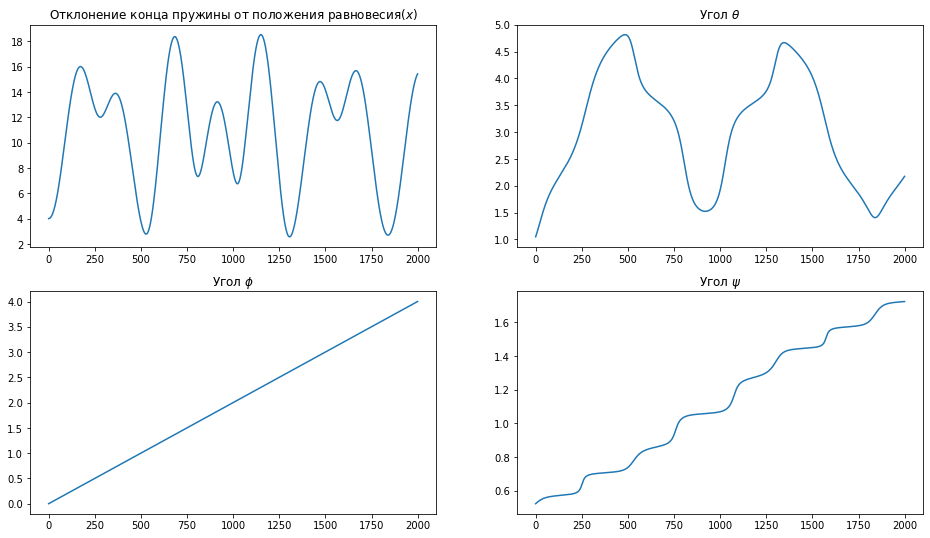

In [52]:
fig,ax = plt.subplots(2,2,figsize = (16,9))
ax[0,0].plot(x)
ax[0,0].set_title(r"Отклонение конца пружины от положения равновесия($x$)")

ax[1,0].plot(phi)
ax[1,0].set_title(r"Угол $\phi$")

ax[0,1].plot(theta)
ax[0,1].set_title(r"Угол $\theta$")

ax[1,1].plot(psi)
ax[1,1].set_title(r"Угол $\psi$")